# Secant method

#### Initiallizing : Clear all global variables if there are remaining variables in the previous work

In [119]:
# Initiallizing : Clear all global variables if there are remaining variables in the previous work
all = [var for var in globals() if var[0] != '_']
for var in all:
    del globals()[var]

#### Import modules

In [120]:
# Import modules
import os, sys, time, numpy as np, pandas as pd, matplotlib.pyplot as plt, scipy as sp, scipy.optimize as opt

### About a function to find a root

#### function 1 : $x^2 - 4x - lnx$
Interval 1 : $[1; 2]$ <br>
Inverval 2 : $[2; 4]$

root 1 = 1.412391172025309, root 2 = 3.057103549994281


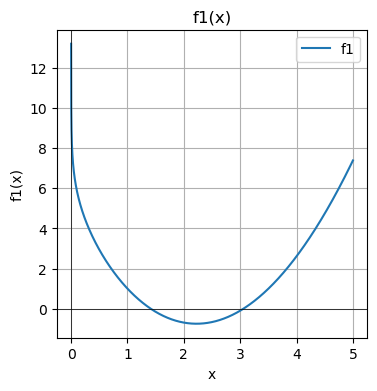

In [121]:
f1 = lambda x : np.power(x, 2) - 4*x + 4 - np.log(x)

############## Roots of function 1 ##############
interval_f1_1 = [1, 2]
interval_f1_2 = [2, 4]

r_interval_f1_1 = opt.root_scalar(f=f1, method='bisect', bracket=interval_f1_1)
r_f1_1 = r_interval_f1_1.root

r_interval_f1_2 = opt.root_scalar(f=f1, method='bisect', bracket=interval_f1_2)
r_f1_2 = r_interval_f1_2.root

print(f'root 1 = {r_f1_1}, root 2 = {r_f1_2}')

############## Plot function 1 ##############
figures, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
x = np.arange(.0001, 5+.0001, .0001)
y = f1(x)
axes.plot(x, y, label='f1')
axes.set_title('f1(x)')
axes.set_xlabel('x')
axes.set_ylabel('f1(x)')
axes.legend()
axes.axhline(y=0, linewidth=0.5, color='k')
axes.axvline(x=0, linewidth=0.5, color='k')
axes.grid()

#### function 2 : $x + 1 - 2sin(pi*x)$
interval 1 : $[0; 0.5]$ <br>
interval 2 : $[0.5; 1]$

root 1 = 0.20603511957051523, root 2 = 0.6819748087382322


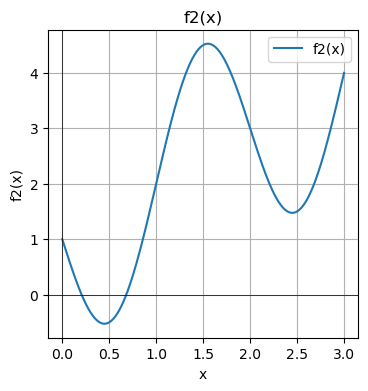

In [122]:
f2 = lambda x : x + 1 - 2*np.sin(np.pi*x)

############## Roots of function 2 ##############
interval_f2_1 = [0, .5]; x0_f2_1 = interval_f2_1[0]
interval_f2_2 = [.5, 1]; x0_f2_2 = interval_f2_2[0]

r_interval_f2_1 = opt.root_scalar(f=f2, method='bisect', bracket=interval_f2_1)
r_f2_1 = r_interval_f2_1.root

r_interval_f2_2 = opt.root_scalar(f=f2, method='bisect', bracket=interval_f2_2)
r_f2_2 = r_interval_f2_2.root

print(f'root 1 = {r_f2_1}, root 2 = {r_f2_2}')

############## Plot of function 2 ##############
figures1, axes1 = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
x = np.arange(.0001, 3+.0001, .0001)
y = f2(x)
axes1.plot(x, y, label='f2(x)')
axes1.set_title('f2(x)')
axes1.set_xlabel('x')
axes1.set_ylabel('f2(x)')
axes1.legend()
axes1.axhline(y=0, linewidth=.5, color='k')
axes1.axvline(x=0, linewidth=.5, color='k')
axes1.grid()

#### Method Test

In [123]:
tol = 1e-5

r0 = interval_f1_1[0]
r1 = interval_f1_1[1]
r_old = r0
r_new = r1
k = 0
err = np.abs(r_new - r_old)
while err > tol:
    k = k + 1
    r_older = r_old
    r_old = r_new
    r_new = r_old - f1(r_old)/(f1(r_old) - f1(r_older)/(r_old - r_older))
    err = np.abs(r_new - r_old)
    if err < tol:
        print(f"Converged By Tolerance. {k:d}-th iteration / |r_new - r_old| = {err:.6f} / r = {r_new:.6f} / f(r) = {f1(r_new):.6f}")
        break
    else:
        print(f"At {k:d}-th iteration : r_new is {r_new:.6f} and the |r_new - r_old| is {err:.6f}")

At 1-th iteration : r_new is 1.590616 and the |r_new - r_old| is 0.409384
At 2-th iteration : r_new is 1.441583 and the |r_new - r_old| is 0.149033
At 3-th iteration : r_new is 1.415202 and the |r_new - r_old| is 0.026382
At 4-th iteration : r_new is 1.412623 and the |r_new - r_old| is 0.002579
At 5-th iteration : r_new is 1.412410 and the |r_new - r_old| is 0.000213
At 6-th iteration : r_new is 1.412393 and the |r_new - r_old| is 0.000017
Converged By Tolerance. 7-th iteration / |r_new - r_old| = 0.000001 / r = 1.412391 / f(r) = -0.000000


#### Define a Method

In [124]:
def secant(func, r0, r1, tol):
    r_old = r0
    r_new = r1
    k = 0
    err = np.abs(r_new - r_old)
    list_k, list_r, list_f = [k], [r0], [func(r0)]
    while err > tol:
        k = k + 1; list_k.append(k)
        r_older = r_old
        r_old = r_new
        r_new = r_old - func(r_old)/(func(r_old) - func(r_older)/(r_old - r_older)); list_r.append(r_new); list_f.append(func(r_new))
        err = np.abs(r_new - r_old)
        if err < tol:
            print(f"Converged By Tolerance. {k:d}-th iteration / r = {r_new:.6f} / f(r) = {func(r_new):.6f} / |r_new - r_old| = {err:.6f}")
            return r_new, np.array(list_k), np.array(list_r), np.array(list_f)
        else:
            print(f"At {k:d}-th iteration : r_new is {r_new:.6f} and the |r_new - r_old| is {err:.6f}")

#### Method implementation

##### Root를 찾을 function 및 구간 먼저 선정

In [125]:
######### function / interval setting #########
idx_case = 4
if idx_case == 1:
    f = f1
    a0 = interval_f1_1[0]
    b0 = interval_f1_1[1]
    r = r_f1_1
elif idx_case == 2:
    f = f1
    a0 = interval_f1_2[0]
    b0 = interval_f1_2[1]
    r = r_f1_2
elif idx_case == 3:
    f = f2
    a0 = interval_f2_1[0]
    b0 = interval_f2_1[1]
    r = r_f2_1
else:
    f = f2
    a0 = interval_f2_2[0]
    b0 = interval_f2_2[1]
    r = r_f2_2

#### function 및 구간 선정 후 method로 root finding

In [126]:
result = secant(func=f, r0=a0, r1=b0, tol=1e-5)
result

At 1-th iteration : r_new is 0.333333 and the |r_new - r_old| is 0.666667
At 2-th iteration : r_new is 0.486611 and the |r_new - r_old| is 0.153277
At 3-th iteration : r_new is 0.731445 and the |r_new - r_old| is 0.244834
At 4-th iteration : r_new is 0.629489 and the |r_new - r_old| is 0.101955
At 5-th iteration : r_new is 0.727287 and the |r_new - r_old| is 0.097797
At 6-th iteration : r_new is 0.634866 and the |r_new - r_old| is 0.092421
At 7-th iteration : r_new is 0.722557 and the |r_new - r_old| is 0.087691
At 8-th iteration : r_new is 0.640547 and the |r_new - r_old| is 0.082010
At 9-th iteration : r_new is 0.717753 and the |r_new - r_old| is 0.077206
At 10-th iteration : r_new is 0.646031 and the |r_new - r_old| is 0.071722
At 11-th iteration : r_new is 0.713170 and the |r_new - r_old| is 0.067139
At 12-th iteration : r_new is 0.651065 and the |r_new - r_old| is 0.062105
At 13-th iteration : r_new is 0.708960 and the |r_new - r_old| is 0.057895
At 14-th iteration : r_new is 0.65

(np.float64(0.6819703509311345),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118]),
 array([0.5       , 0.33333333, 0.4866106 , 0.73144456, 0.62948919,
        0.72728659, 0.63486584, 0.72255694, 0.64054679, 0.71775321,
        0.64603086, 0.71316996, 0.65106476, 0.70895973, 0.6555491 ,
        0.70518534, 0.65947042, 0.7018565 , 0.66285907, 0.69895353,
        0.66576498

#### Error = r* - r

In [127]:
r_sequence = result[2]
err = np.abs(r_sequence - r)
err

array([1.81974809e-01, 3.48641475e-01, 1.95364209e-01, 4.94697482e-02,
       5.24856176e-02, 4.53117773e-02, 4.71089730e-02, 4.05821310e-02,
       4.14280182e-02, 3.57783983e-02, 3.59439531e-02, 3.11951483e-02,
       3.09100531e-02, 2.69849228e-02, 2.64257065e-02, 2.32105307e-02,
       2.25043872e-02, 1.98816937e-02, 1.91157418e-02, 1.69787254e-02,
       1.62098276e-02, 1.44671794e-02, 1.37304150e-02, 1.23066131e-02,
       1.16219305e-02, 1.04556405e-02, 9.83280385e-03, 8.87469546e-03,
       8.31683454e-03, 7.52740877e-03, 7.03350100e-03, 6.38116505e-03,
       5.94773284e-03, 5.40718985e-03, 5.02943707e-03, 4.58038069e-03,
       4.25293587e-03, 3.87901074e-03, 3.59639901e-03, 3.28438108e-03,
       3.04131149e-03, 2.78046488e-03, 2.57199415e-03, 2.35356724e-03,
       2.17518207e-03, 1.99201227e-03, 1.83965929e-03, 1.68586239e-03,
       1.55594546e-03, 1.42667037e-03, 1.31602845e-03, 1.20726298e-03,
       1.11313735e-03, 1.02155340e-03, 9.41550066e-04, 8.64379814e-04,
      

#### Error vs Iteration Plot
Secant method는 Newton method와 다르게 f(x) = 0이 되는 점을 잘 찾음.

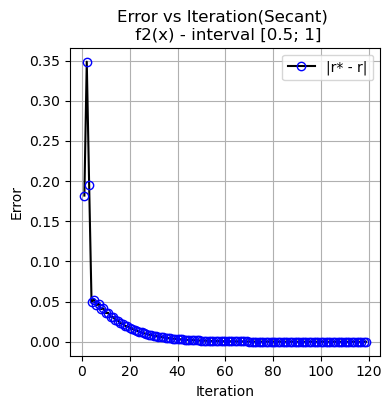

In [128]:
figures, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
axes.plot(np.arange(len(r_sequence))+1, err, 'o-', markerfacecolor='none', markeredgecolor='blue', color='black', label='|r* - r|')
axes.set_title(f'Error vs Iteration(Secant) \n f{idx_case//3 + 1}(x) - interval [{a0}; {b0}]')
axes.set_xlabel('Iteration')
axes.set_ylabel('Error')
axes.legend()
axes.grid()